# Background

NYC has a combined sewage system. This means that both stormwater and wastewater are collected into one sewer system to be conveyed to a wastewater resource recovery facility. Once at the facility, the water gets treated to be released into local waterways. However, during precipitation events, it is possible for the sewage system to go over capacity. When this happens, the system releases untreated sewage into local waterways through what are called a combined sewage overflows (CSOs). This can result in hazardous conditions in waterways as it is possible that harmful pathogens reach surface waters creating a risk for disease. New York's Department of Health and Mental Hygiene periodically tests NYC beaches for water quality. The main metric that is measured is the number of enterococci. While enterococci are not in their entirety hazardous, they are considered fecal indicator bacteria, as they can be indicative of the presence of E. Coli and other problematic bactera. The NYS Department of Health specifies that any single sample of surface water should not contain more than 104 enterococci colony forming units per 100 mL of marine water. The following model will use historical NYC beach water quality data provided by NYC OpenData, as well as precipitation and surface water temperature data provided by NOAA to predict the number of enterococci per 100 mL based on weather forecasts. With this quantification, it is then possible to classify the prediction as either being within standard, or over the 104 enterococci per 100 mL limit.

This model will analyze water quality in beaches near Eastchester Bay in the Throggs Neck area of The Bronx. This area is downstream of the Hutchinson River where multiple CSO outalls are located servicing the upper east Bronx area.

Multiple factors are accounted for in analyzing the data. The enterococci are attributed to an estimate of the population for the given date, the average surface water temperature, precipitation measurements which are given in inches for the day before the sample was collected and the actual day of collection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import *

### Read in the csv file containing the data of interest and show the head

In [2]:
enteroData = pd.read_csv('enteroData.csv')
print(enteroData.shape)
enteroData.head()

(3560, 9)


,Sample Date,Enterococci Results,Year Population,Day Before Precipitation,Day of Precipitation,Water Temperature,Sum Precip,Month,Year
0,6/1/2005,4.0,7939571,0.0,0.0,15.23,0.0,6,2005
1,6/1/2005,4.0,7939571,0.0,0.0,15.23,0.0,6,2005
2,6/1/2005,4.0,7939571,0.0,0.0,15.23,0.0,6,2005
3,6/1/2005,4.0,7939571,0.0,0.0,15.23,0.0,6,2005
4,6/8/2005,4.0,7939571,0.0,0.0,17.89,0.0,6,2005


### Data Correspondence

This chart shows the relationship between the enterococcus levels in the water and the precipitation received the day before the sample was taken

(0.2795576065972698, 6.411397361934058e-65)

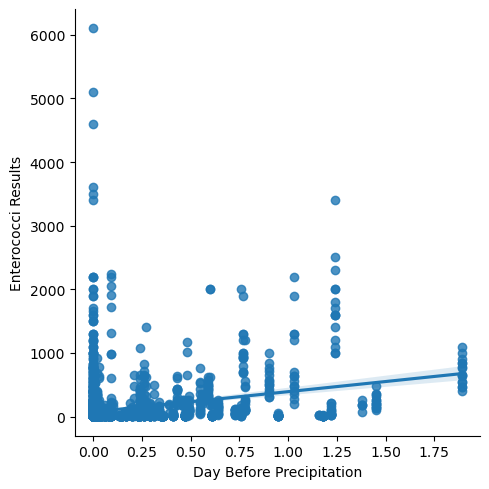

In [3]:
sns.lmplot(x = 'Day Before Precipitation', y='Enterococci Results', data=enteroData)

stats.pearsonr(enteroData['Day Before Precipitation'], enteroData['Enterococci Results'])

In [4]:
print("the correlation coefficient of this data is: R=" + str(enteroData['Day Before Precipitation'].corr(enteroData['Enterococci Results'])))

the correlation coefficient of this data is: R=0.2795576065972699


This chart shows the relationship between the enterococcus levels in the water and the precipitation received the day the sample was taken

(0.2574930224022811, 5.13491058042138e-55)

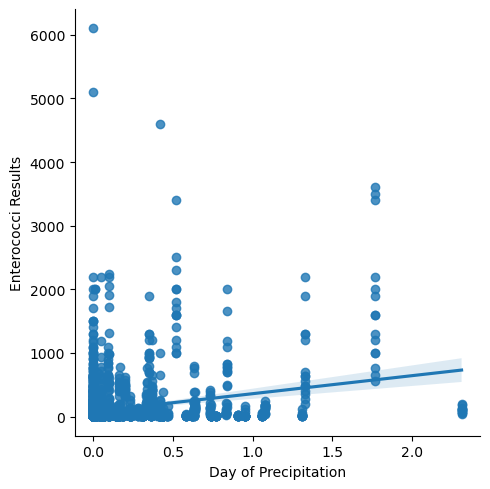

In [5]:
sns.lmplot(x = 'Day of Precipitation', y='Enterococci Results', data=enteroData)

stats.pearsonr(enteroData['Day of Precipitation'], enteroData['Enterococci Results'])

This chart shows the relationship between the enterococcus levels in the water and the sum of the precipitation received the day the sample was taken, and the day prior to it

(0.3652795245410396, 8.248227482258323e-113)

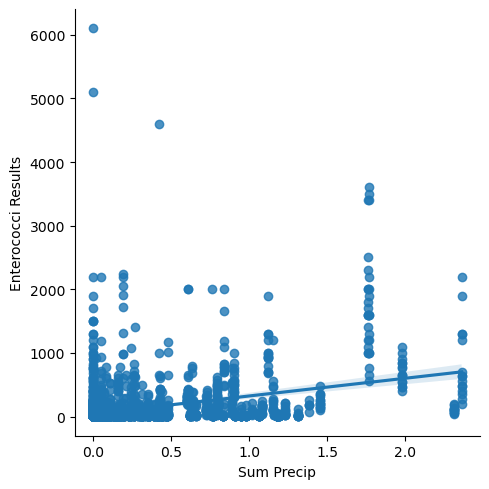

In [6]:
sns.lmplot(x = 'Sum Precip', y='Enterococci Results', data=enteroData)

stats.pearsonr(enteroData['Sum Precip'], enteroData['Enterococci Results'])

This feature map shows a summary of correspondences

C:\Users\Kevin\AppData\Local\Temp\ipykernel_22036\2178018623.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = enteroData.corr()


<AxesSubplot:>

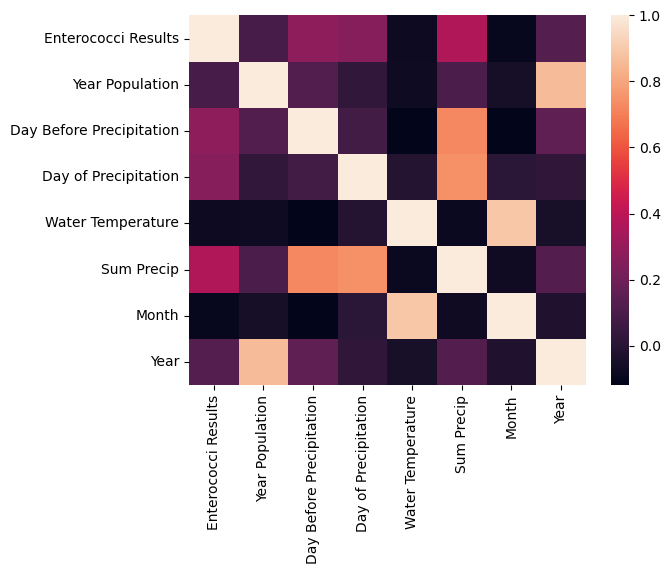

In [7]:
cormat = enteroData.corr()
round(cormat, 2)
sns.heatmap(cormat)

### Data Reduction for CSO Rainfall Data

CSOs typically occur when there is rain intensity of 0.1 in/hr, therefore under the assumption that the average storm lasts 30 minutes, 0.05 inches of rainfall during is possibly associated with this intensity and so will be used as the basis for reducing our data:

In [8]:
wetData = enteroData[(enteroData['Day Before Precipitation'] > 0.05) | (enteroData['Day of Precipitation'] > 0.05)]

print(wetData.shape)
wetData.head()

(1408, 9)


,Sample Date,Enterococci Results,Year Population,Day Before Precipitation,Day of Precipitation,Water Temperature,Sum Precip,Month,Year
54,5/30/2006,4.0,7904335,0.20,0.00,15.92,0.20,5,2006
55,5/30/2006,4.0,7904335,0.20,0.00,15.92,0.20,5,2006
56,5/30/2006,4.0,7904335,0.20,0.00,15.92,0.20,5,2006
69,6/27/2006,4.0,7904335,0.06,0.05,19.44,0.11,6,2006
70,6/27/2006,4.0,7904335,0.06,0.05,19.44,0.11,6,2006


(0.2666780050297126, 2.3685622406658848e-24)

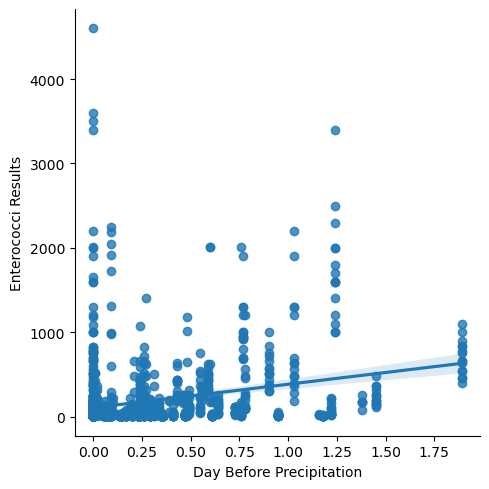

In [9]:
sns.lmplot(x = 'Day Before Precipitation', y='Enterococci Results', data=wetData)

stats.pearsonr(wetData['Day Before Precipitation'], wetData['Enterococci Results'])

(0.23498683254568528, 4.0696810067762385e-19)

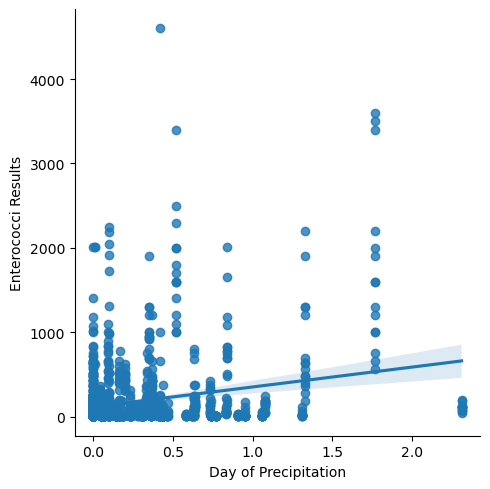

In [10]:
sns.lmplot(x = 'Day of Precipitation', y='Enterococci Results', data=wetData)

stats.pearsonr(wetData['Day of Precipitation'], wetData['Enterococci Results'])

(0.39670040946309004, 2.818927826406957e-54)

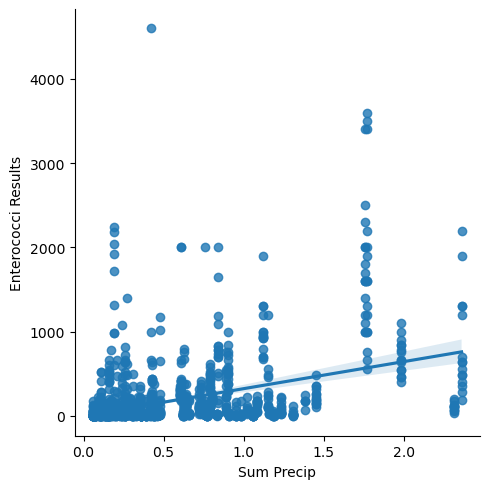

In [11]:
sns.lmplot(x = 'Sum Precip', y='Enterococci Results', data=wetData)

stats.pearsonr(wetData['Sum Precip'], wetData['Enterococci Results'])

C:\Users\Kevin\AppData\Local\Temp\ipykernel_22036\3997515955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = wetData.corr()


<AxesSubplot:>

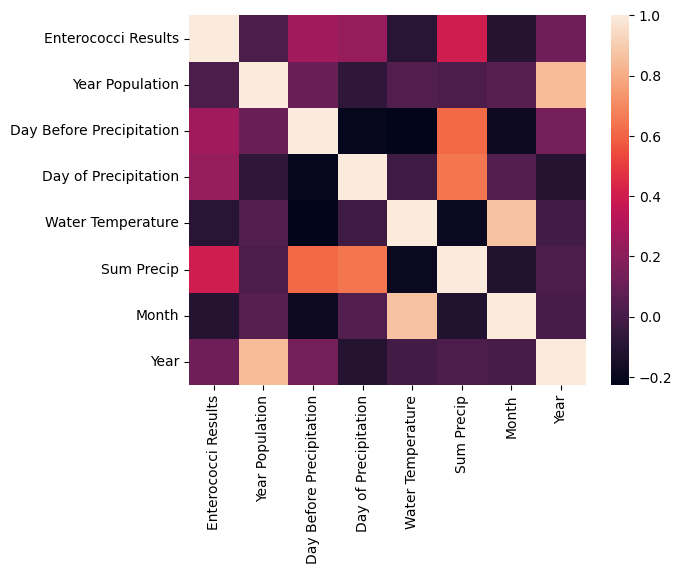

In [12]:
cormat = wetData.corr()
round(cormat, 2)
sns.heatmap(cormat)

### Looking at average values to see how the correlations differ

In [13]:
enteroAvgData = pd.read_csv('enteroDataAvg.csv')

print(enteroAvgData.shape)
enteroAvgData.head()

(325, 9)


,Sample Date,Enterococci Results,Year Population,Day Before Precipitation,Day of Precipitation,Water Temperature,Sum Precip,Month,Year
0,6/1/2005,9.846154,7939571,0.0,0.00,15.23,0.00,6,2005
1,6/8/2005,24.923077,7939571,0.0,0.00,17.89,0.00,6,2005
2,6/14/2005,4.000000,7939571,0.0,0.00,19.17,0.00,6,2005
3,6/20/2005,33.200000,7939571,0.0,0.00,18.56,0.00,6,2005
4,7/5/2005,4.800000,7939571,0.0,0.04,21.23,0.04,7,2005


(0.3408874380729119, 2.757999974887596e-10)

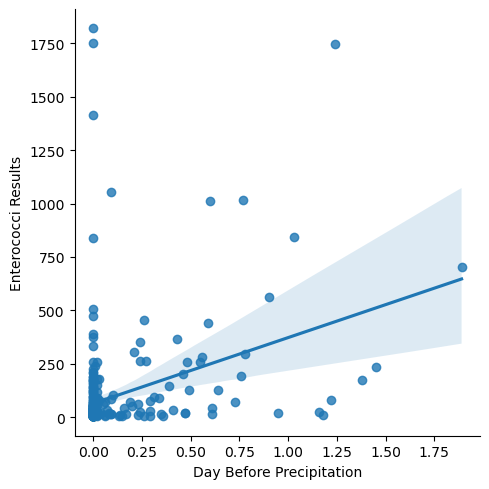

In [14]:
sns.lmplot(x = 'Day Before Precipitation', y='Enterococci Results', data=enteroAvgData)

stats.pearsonr(enteroAvgData['Day Before Precipitation'], enteroAvgData['Enterococci Results'])

(0.2898810840778553, 1.0351644323657112e-07)

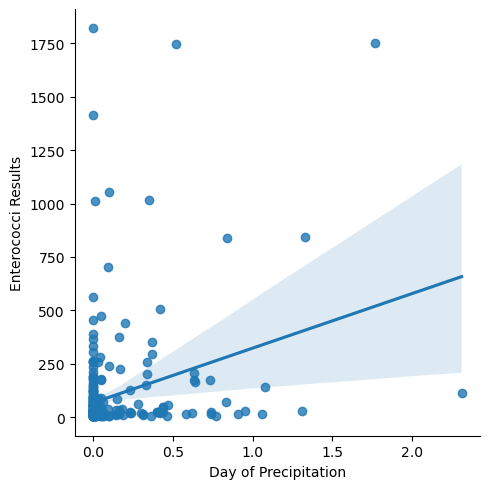

In [15]:
sns.lmplot(x = 'Day of Precipitation', y='Enterococci Results', data=enteroAvgData)

stats.pearsonr(enteroAvgData['Day of Precipitation'], enteroAvgData['Enterococci Results'])

(0.4296640605850938, 4.938145676052617e-16)

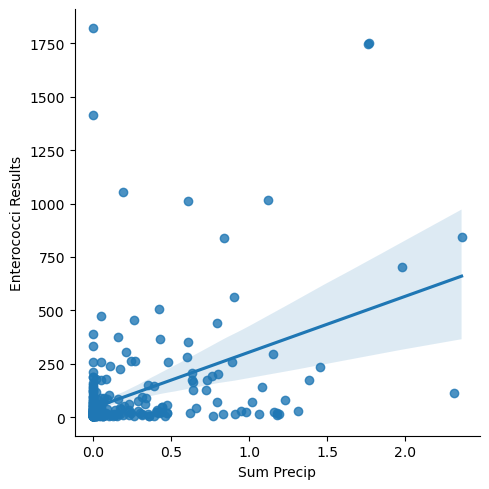

In [16]:
sns.lmplot(x = 'Sum Precip', y='Enterococci Results', data=enteroAvgData)

stats.pearsonr(enteroAvgData['Sum Precip'], enteroAvgData['Enterococci Results'])

C:\Users\Kevin\AppData\Local\Temp\ipykernel_22036\2071638441.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = enteroAvgData.corr()


<AxesSubplot:>

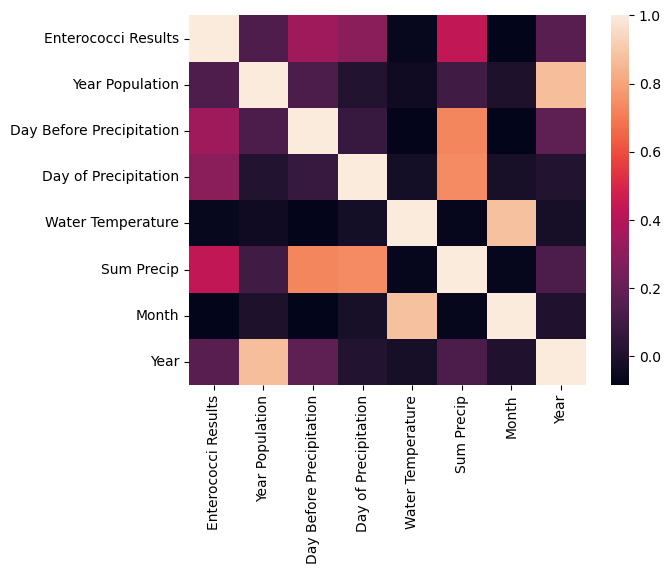

In [17]:
cormat = enteroAvgData.corr()
round(cormat, 2)
sns.heatmap(cormat)

In [18]:
wetAvgData = enteroAvgData[(enteroAvgData['Day Before Precipitation'] > 0.05) | (enteroAvgData['Day of Precipitation'] > 0.05)]

print(wetAvgData.shape)
wetAvgData.head()

(114, 9)


,Sample Date,Enterococci Results,Year Population,Day Before Precipitation,Day of Precipitation,Water Temperature,Sum Precip,Month,Year
17,5/30/2006,52.000000,7904335,0.20,0.00,15.92,0.20,5,2006
20,6/27/2006,8.000000,7904335,0.06,0.05,19.44,0.11,6,2006
21,7/5/2006,16.615385,7904335,0.00,1.06,19.92,1.06,7,2006
23,7/18/2006,23.714286,7904335,0.00,0.44,22.11,0.44,7,2006
39,6/19/2007,6.857143,7908735,0.00,0.06,20.72,0.06,6,2007


(0.3341265837130817, 0.0002799552070411028)

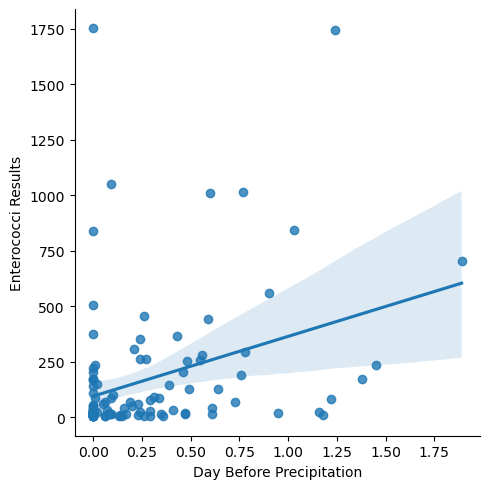

In [19]:
sns.lmplot(x = 'Day Before Precipitation', y='Enterococci Results', data=wetAvgData)

stats.pearsonr(wetAvgData['Day Before Precipitation'], wetAvgData['Enterococci Results'])

(0.2570951253237035, 0.005756305904676684)

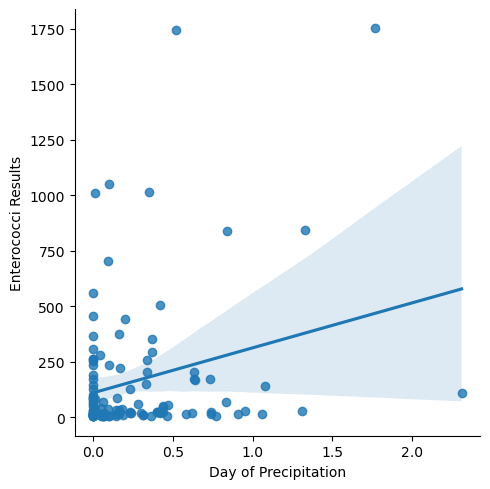

In [20]:
sns.lmplot(x = 'Day of Precipitation', y='Enterococci Results', data=wetAvgData)

stats.pearsonr(wetAvgData['Day of Precipitation'], wetAvgData['Enterococci Results'])

(0.46956513692270735, 1.3616492769962484e-07)

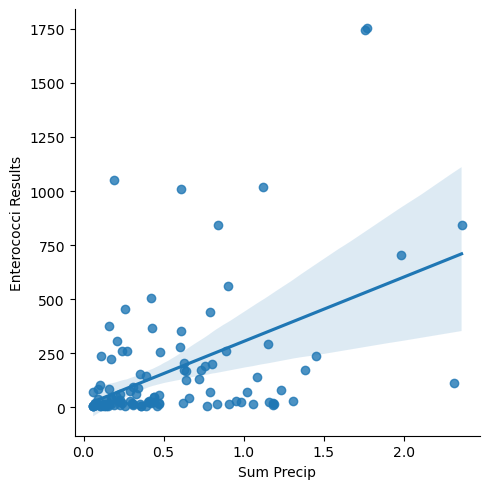

In [21]:
sns.lmplot(x = 'Sum Precip', y='Enterococci Results', data=wetAvgData)

stats.pearsonr(wetAvgData['Sum Precip'], wetAvgData['Enterococci Results'])

C:\Users\Kevin\AppData\Local\Temp\ipykernel_22036\2532116915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = wetAvgData.corr()


<AxesSubplot:>

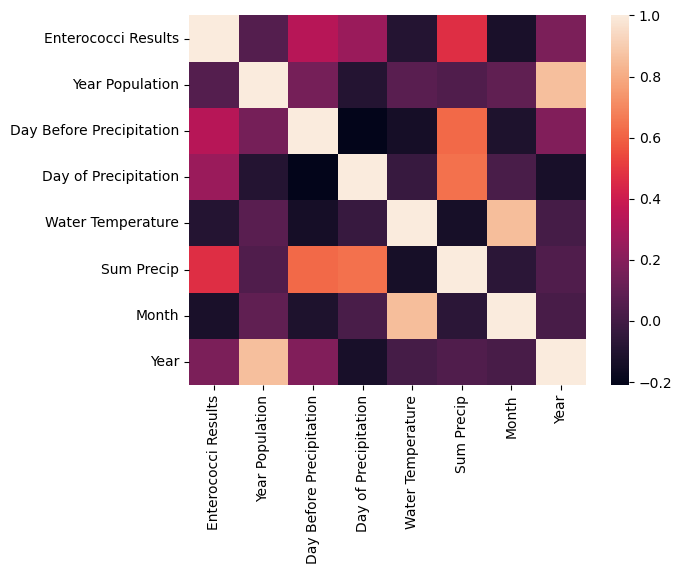

In [22]:
cormat = wetAvgData.corr()
round(cormat, 2)
sns.heatmap(cormat)

Defining Dependent Variable

In [23]:
# The dependent variable, also called the label, is what we are trying to predict
# The labels DataFrame is first initiated like this for the visual representation
enteroLabels = pd.DataFrame({"Enterococci Results": enteroData['Enterococci Results']})
enteroLabels.head()

,Enterococci Results
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [24]:
wetLabels = pd.DataFrame({"Enterococci Results": wetData['Enterococci Results']})
wetLabels.head()

,Enterococci Results
54,4.0
55,4.0
56,4.0
69,4.0
70,4.0


In [25]:
# This is done to put the dataframe back into the format for the model
enteroLabels = enteroData['Enterococci Results']
wetLabels = wetData['Enterococci Results']

Defining Independent Variables/Predictors

In [26]:
# Dropping dependent variable and Date
features = wetData.drop('Enterococci Results', axis=1)
features = features.drop('Sample Date', axis=1)

# Dependent Variables, also called features
featureList = list(features.columns)

print(features.shape)
features.head()

(1408, 7)


,Year Population,Day Before Precipitation,Day of Precipitation,Water Temperature,Sum Precip,Month,Year
54,7904335,0.20,0.00,15.92,0.20,5,2006
55,7904335,0.20,0.00,15.92,0.20,5,2006
56,7904335,0.20,0.00,15.92,0.20,5,2006
69,7904335,0.06,0.05,19.44,0.11,6,2006
70,7904335,0.06,0.05,19.44,0.11,6,2006
